 # Intro Pandas

**Objectifs d'apprentissage :**
  * Introduction aux structures de données `DataFrame` et `Series` de la bibliothèque *Pandas*
  * Accéder aux données et les manipuler dans une structure `DataFrame` et `Series`
  * Importer des données d'un fichier CSV dans un `DataFrame` *Pandas*
  * Réindexer un `DataFrame` pour restructurer les données

 [*Pandas*](http://pandas.pydata.org/) est une API d'analyse de données orientée colonnes. C'est un excellent outil pour manipuler et analyser des données d'entrée. Beaucoup de frameworks d'apprentissage automatique en IA acceptent les structures de données *Pandas* en entrée.

La librairie pandas permet de manipuler de façon performantes et facile des données structurées, par exemple sous forme de tableau. elle met à notre disposition des fonctions qui permettent de trier, consolider, compléter vos données et de les exporter dans divers format (csv, latex, excel ...)

Pour une description plus complète, vous pouvez consulter le [site de documentation officielle de *Pandas*](http://pandas.pydata.org/pandas-docs/stable/index.html), sur lequel vous trouverez de multiples informations ainsi que de nombreux didacticiels.


 [NumPy](http://www.numpy.org/) est un kit d'outils de calculs scientifiques populaire. Les `Series` *Pandas* peuvent faire office d'arguments pour la plupart des fonctions NumPy :

 # Concepts de base

La ligne de code suivante permet d'importer l'API *pandas* et d'afficher sa version :

In [1]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)




1.3.4
1.20.3


## Les Structures de données

On distingue deux grandes catégories de structures de données *Pandas* :

  * Le **`DataFrame`**, un tableau relationnel de données, avec des lignes et des colonnes étiquetées
  * La **`Series`**, constituée d'une seule colonne. Un `DataFrame` contient une ou plusieurs `Series`, chacune étant étiquetée.

Le DataFrame est une abstraction fréquemment utilisée pour manipuler des données. [Spark](https://spark.apache.org/) et [R](https://www.r-project.org/about.html) proposent des implémentations similaires.

 Pour créer une `Series`, vous pouvez notamment créer un objet `Series`. Par exemple :
 
 s = pd.Series(data, index=index)
 
! data peut etre un elem, une liste ou un dictionnaire..

In [2]:
pd.Series(['Paris', 'Lille', 'Toulouse'])

0       Paris
1       Lille
2    Toulouse
dtype: object

In [3]:
pd.Series(['Paris', 'Lille', 'Toulouse'],index=["a","b","c"])

a       Paris
b       Lille
c    Toulouse
dtype: object

 Il est possible de créer des objets `DataFrame` en transmettant un `dictionnaire` qui met en correspondance les noms de colonnes (des `chaînes de caractères`) avec leurs `Series` respectives. Lorsque la longueur de la `Serie` ne correspond pas, les valeurs manquantes sont remplacées par des valeurs [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) spéciales. 
 
Exemple :

In [4]:
city_names = pd.Series(['Paris', 'Lille', 'Toulouse'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,Paris,852469
1,Lille,1015785
2,Toulouse,485199


 Le plus souvent, vous chargez un fichier entier dans un `DataFrame`. Dans l'exemple qui suit, le fichier chargé contient des données immobilières pour la Californie. 
 


In [5]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 Dans l'exemple ci-dessus, la méthode `DataFrame.describe` permet d'afficher des statistiques intéressantes concernant un `DataFrame`. La fonction `DataFrame.head` est également utile pour afficher les premiers enregistrements d'un `DataFrame` :

In [6]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [7]:
california_housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [8]:
california_housing_dataframe.index

RangeIndex(start=0, stop=17000, step=1)

In [9]:
california_housing_dataframe.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [10]:
# Transposing data
california_housing_dataframe.T

,0,1,2,3,4,5,6,7,8,9,...,16990,16991,16992,16993,16994,16995,16996,16997,16998,16999
longitude,-114.3100,-114.47,-114.5600,-114.5700,-114.570,-114.5800,-114.5800,-114.5900,-114.5900,-114.6000,...,-124.2200,-124.2300,-124.2300,-124.2300,-124.2500,-124.2600,-124.2700,-124.3000,-124.3000,-124.3500
latitude,34.1900,34.40,33.6900,33.6400,33.570,33.6300,33.6100,34.8300,33.6100,34.8300,...,41.7300,41.7500,40.8100,40.5400,40.2800,40.5800,40.6900,41.8400,41.8000,40.5400
housing_median_age,15.0000,19.00,17.0000,14.0000,20.000,29.0000,25.0000,41.0000,34.0000,46.0000,...,28.0000,11.0000,52.0000,52.0000,32.0000,52.0000,36.0000,17.0000,19.0000,52.0000
total_rooms,5612.0000,7650.00,720.0000,1501.0000,1454.000,1387.0000,2907.0000,812.0000,4789.0000,1497.0000,...,3003.0000,3159.0000,1112.0000,2694.0000,1430.0000,2217.0000,2349.0000,2677.0000,2672.0000,1820.0000
total_bedrooms,1283.0000,1901.00,174.0000,337.0000,326.000,236.0000,680.0000,168.0000,1175.0000,309.0000,...,699.0000,616.0000,209.0000,453.0000,419.0000,394.0000,528.0000,531.0000,552.0000,300.0000
population,1015.0000,1129.00,333.0000,515.0000,624.000,671.0000,1841.0000,375.0000,3134.0000,787.0000,...,1530.0000,1343.0000,544.0000,1152.0000,434.0000,907.0000,1194.0000,1244.0000,1298.0000,806.0000
households,472.0000,463.00,117.0000,226.0000,262.000,239.0000,633.0000,158.0000,1056.0000,271.0000,...,653.0000,479.0000,172.0000,435.0000,187.0000,369.0000,465.0000,456.0000,478.0000,270.0000
median_income,1.4936,1.82,1.6509,3.1917,1.925,3.3438,2.6768,1.7083,2.1782,2.1908,...,1.7038,2.4805,3.3462,3.0806,1.9417,2.3571,2.5179,3.0313,1.9797,3.0147
median_house_value,66900.0000,80100.00,85700.0000,73400.0000,65500.000,74000.0000,82400.0000,48500.0000,58400.0000,48100.0000,...,78300.0000,73200.0000,50800.0000,106700.0000,76100.0000,111400.0000,79000.0000,103600.0000,85800.0000,94600.0000


In [11]:
california_housing_dataframe.sort_index(axis=1, ascending=False)

,total_rooms,total_bedrooms,population,median_income,median_house_value,longitude,latitude,housing_median_age,households
0,5612.0,1283.0,1015.0,1.4936,66900.0,-114.31,34.19,15.0,472.0
1,7650.0,1901.0,1129.0,1.8200,80100.0,-114.47,34.40,19.0,463.0
2,720.0,174.0,333.0,1.6509,85700.0,-114.56,33.69,17.0,117.0
3,1501.0,337.0,515.0,3.1917,73400.0,-114.57,33.64,14.0,226.0
4,1454.0,326.0,624.0,1.9250,65500.0,-114.57,33.57,20.0,262.0
...,...,...,...,...,...,...,...,...,...
16995,2217.0,394.0,907.0,2.3571,111400.0,-124.26,40.58,52.0,369.0
16996,2349.0,528.0,1194.0,2.5179,79000.0,-124.27,40.69,36.0,465.0
16997,2677.0,531.0,1244.0,3.0313,103600.0,-124.30,41.84,17.0,456.0
16998,2672.0,552.0,1298.0,1.9797,85800.0,-124.30,41.80,19.0,478.0


In [12]:
california_housing_dataframe.sort_values(by="median_house_value")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
568,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0
16643,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0
16801,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0
3226,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0
7182,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0
...,...,...,...,...,...,...,...,...,...
15834,-122.42,37.81,52.0,1314.0,317.0,473.0,250.0,4.3472,500001.0
7927,-118.40,33.87,38.0,2398.0,431.0,911.0,392.0,5.2319,500001.0
3546,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,500001.0
7924,-118.40,33.88,35.0,1060.0,191.0,444.0,196.0,8.0015,500001.0


In [13]:
california_housing_dataframe['housing_median_age'].unique()

array([15., 19., 17., 14., 20., 29., 25., 41., 34., 46., 16., 21., 48.,
       31., 28., 24., 18., 30., 32., 23., 38., 35., 33., 13., 11., 10.,
        6., 12., 27., 22.,  5.,  8., 37.,  3., 44.,  2., 26.,  9.,  7.,
       36.,  4., 52., 40., 43., 42., 39., 49., 47., 50., 45., 51.,  1.])

In [14]:
california_housing_dataframe.nunique()

longitude               827
latitude                840
housing_median_age       52
total_rooms            5533
total_bedrooms         1848
population             3683
households             1740
median_income         11175
median_house_value     3694
dtype: int64

In [15]:
california_housing_dataframe['housing_median_age'].nunique()

52

In [16]:
california_housing_dataframe["housing_median_age"].value_counts()

52.0    1052
36.0     715
35.0     692
16.0     635
17.0     576
34.0     567
33.0     513
26.0     503
18.0     478
25.0     461
32.0     458
37.0     437
15.0     416
19.0     412
28.0     400
27.0     397
24.0     389
31.0     384
30.0     384
20.0     383
23.0     382
29.0     374
21.0     373
14.0     347
22.0     323
38.0     318
42.0     308
39.0     302
44.0     296
43.0     286
13.0     249
40.0     249
45.0     235
41.0     232
10.0     226
11.0     208
5.0      199
46.0     196
12.0     192
8.0      178
47.0     175
9.0      172
4.0      161
7.0      151
48.0     135
6.0      129
50.0     112
49.0     111
2.0       49
3.0       46
51.0      32
1.0        2
Name: housing_median_age, dtype: int64

In [17]:
def times2(x):
    return x*2

In [18]:
california_housing_dataframe["double"]=california_housing_dataframe['housing_median_age'].apply(times2)
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,double
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,30.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,38.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,34.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,28.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,40.0


In [19]:
california_housing_dataframe['housing_median_age'].sum()

486019.0

In [20]:
del california_housing_dataframe["double"]
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


à lire: https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html 

## La visualisation de données 

Autre fonction puissante de Pandas : **la représentation graphique** 
 
 Avec `DataFrame.hist`, par exemple, vous pouvez vérifier rapidement la façon avec laquelle les valeurs d'une colonne sont distribuées :

In [21]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

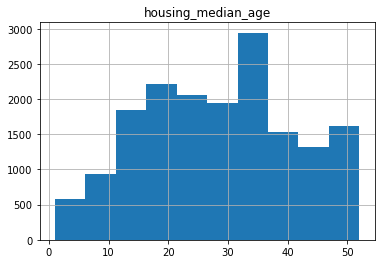

In [22]:
california_housing_dataframe.hist('housing_median_age')

array([[<AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

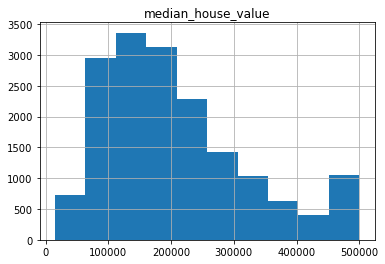

In [23]:
california_housing_dataframe.hist('median_house_value')

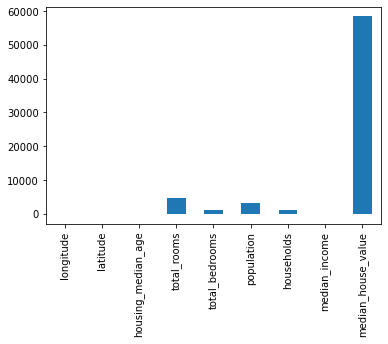

In [24]:
california_housing_dataframe.iloc[8].plot(kind="bar");

* Basic plottings

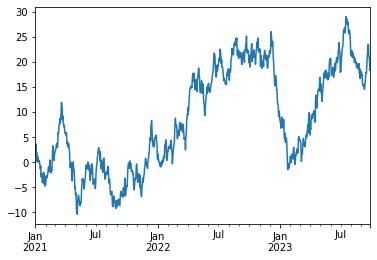

In [25]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2021", periods=1000))

ts = ts.cumsum()

ts.plot();

On trouve d'autres types de plots avec des styles autres que linéaire (par défaut).

* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots

=> Ces méthodes peuvent être spécifiées avec le mot clé *kind=* en tant qu’argument à plot() :

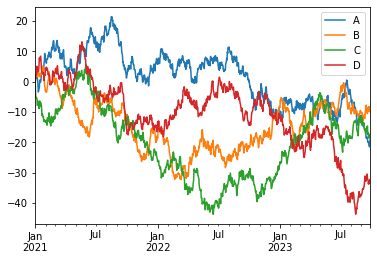

In [26]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
df.plot();


In [27]:
df.head()

,A,B,C,D
2021-01-01,0.790464,0.812857,-0.918186,-0.056098
2021-01-02,1.169280,1.779398,-4.622366,0.891088
2021-01-03,1.734921,2.251117,-5.374651,2.128323
2021-01-04,1.064945,2.438757,-5.283374,2.341540
2021-01-05,2.265993,3.439263,-5.356088,2.628018


à lire: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

 ## Accéder aux données

L'accès aux données d'un `DataFrame` s'effectue au moyen d'opérations de liste ou de dictionnaire Python courantes :

 *Pandas* propose en outre une API extrêmement riche, avec des fonctions avancées d'[indexation ](http://pandas.pydata.org/pandas-docs/stable/indexing.html) et [de sélection](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) basées sur les méthodes .at, .iat, .loc et .iloc.

In [28]:
cities = pd.DataFrame({ 'City_name': city_names, 'Population': population })
cities.head()

,City_name,Population
0,Paris,852469
1,Lille,1015785
2,Toulouse,485199


In [29]:
#Selecting Columns
print(type(cities['City_name']))
cities['City_name']
#equivalent
#cities.City_name

<class 'pandas.core.series.Series'>


0       Paris
1       Lille
2    Toulouse
Name: City_name, dtype: object

In [30]:
print(type(cities['City_name'][1]))
print(cities['City_name'][1])
cities.City_name[1]

<class 'str'>
Lille


'Lille'

In [31]:
#Selecting rows
print(type(cities[0:2]))
cities[0:3]

<class 'pandas.core.frame.DataFrame'>


,City_name,Population
0,Paris,852469
1,Lille,1015785
2,Toulouse,485199


In [32]:
cities.loc[1]

City_name       Lille
Population    1015785
Name: 1, dtype: object

In [33]:
# Selecting multi axis label + Slicing
cities.loc[1:2, ["Population"]]

,Population
1,1015785
2,485199


 ## Manipuler des données

Il est possible d'effectuer des opérations arithmétiques de base de Python sur les `Series`. Par exemple :

In [34]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

In [35]:
print(type(population))

<class 'pandas.core.series.Series'>


 [NumPy](http://www.numpy.org/) est un kit d'outils de calculs scientifiques populaire. Les `Series` *Pandas* peuvent faire office d'arguments pour la plupart des fonctions NumPy :

In [36]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

 La méthode `Series.apply` convient pour les transformations à une colonne plus complexes. Comme la [fonction `map`](https://docs.python.org/2/library/functions.html#map) de Python, elle accepte en argument une [fonction `lambda`](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), appliquée à chaque valeur.

L'exemple ci-dessous permet de créer une `Series` signalant si la `population` dépasse ou non un million d'habitants :

In [37]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

 
La modification des `DataFrames` est plutôt simple. 

Exemple: ajouter deux `Series` à un `DataFrame` existant 

In [38]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities.loc[0:1, "year"] = 2000
cities

,City_name,Population,Area square miles,Population density,year
0,Paris,852469,46.87,18187.945381,2000.0
1,Lille,1015785,176.53,5754.177760,2000.0
2,Toulouse,485199,97.92,4955.055147,NaN


*Pandas* peut ajouter automatiquement des valeurs manquantes. Mais on peut aussi indiquer explicitement des valeurs manquantes. 

Trois valeurs correspondant à trois types peuvent indiquer des valeurs manquantes :

-   `nan` (du module `numpy` par exemple) pour toutes les valeurs
    numériques
-   `None` pour les objets en général
-   `NaT` (Not a Time, du module `pandas`) pour les dates

On peut tester une une valeur est manquante avec la fonction `isnull` :

In [39]:
print(pd.isnull(np.nan), pd.isnull(None), pd.isnull(pd.NaT))

True True True


In [40]:
cities.dropna(how="any")

,City_name,Population,Area square miles,Population density,year
0,Paris,852469,46.87,18187.945381,2000.0
1,Lille,1015785,176.53,5754.177760,2000.0


In [41]:
pd.isna(cities)

,City_name,Population,Area square miles,Population density,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,True


In [42]:
cities.isnull()

,City_name,Population,Area square miles,Population density,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,True


In [43]:
# Détection de valeurs manquantes
cities.isnull().sum()

City_name             0
Population            0
Area square miles     0
Population density    0
year                  1
dtype: int64

In [44]:
cities= cities.fillna(value=2001)
cities

,City_name,Population,Area square miles,Population density,year
0,Paris,852469,46.87,18187.945381,2000.0
1,Lille,1015785,176.53,5754.177760,2000.0
2,Toulouse,485199,97.92,4955.055147,2001.0


 Appelez `DataFrame.reindex` pour réorganiser manuellement les lignes. Le code suivant, par exemple, revient à trier les données par nom de ville :

In [45]:
cities.reindex([2, 0, 1])

,City_name,Population,Area square miles,Population density,year
2,Toulouse,485199,97.92,4955.055147,2001.0
0,Paris,852469,46.87,18187.945381,2000.0
1,Lille,1015785,176.53,5754.177760,2000.0


 La réindexation est un excellent moyen de mélanger (organiser aléatoirement) les données d'un `DataFrame`. Dans l'exemple ci-dessous, l'index de type tableau est transmis à la fonction NumPy `random.permutation`, qui mélange les valeurs. En appelant `reindex` avec ce tableau mélangé, nous mélangeons également les lignes du `DataFrame`.
Exécutez plusieurs fois la cellule suivante !

* Attention

La méthode `reindex` autorise les valeurs d'index autres que celles associées au `DataFrame` d'origine. Pourquoi est-ce autorisé à votre avis ?

 => Lorsque le tableau d'entrée `reindex` contient des valeurs d'index ne faisant pas partie de la liste des index du `DataFrame` d'origine, `reindex` ajoute des lignes pour ces index \'manquants\' et insère la valeur `NaN` dans les colonnes correspondantes :

In [46]:
cities.reindex([0, 4, 5, 2])

,City_name,Population,Area square miles,Population density,year
0,Paris,852469.0,46.87,18187.945381,2000.0
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Toulouse,485199.0,97.92,4955.055147,2001.0


 Ce comportement est souhaitable, car les index sont souvent des chaînes de caractères extraites des données réelles. La [documentation *Pandas* sur la fonction `reindex`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) inclut un exemple avec des noms de navigateurs comme valeurs d'index).

Dans ce cas, autoriser les index \'manquants\' facilite la réindexation à l'aide d'une liste externe, car vous n'avez pas à vous préoccuper de l'intégrité des données d'entrée.

In [63]:
cities.reindex(np.random.permutation(cities.index))

,City_name,Population,Area square miles,Population density,year,selected
0,Paris,852469,46.87,18187.945381,2000.0,False
2,Toulouse,485199,97.92,4955.055147,2001.0,False
1,Lille,1015785,176.53,5754.177760,2000.0,True


 Pour en savoir plus, consultez la [documentation relative aux index](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

 ## Exercice n° 1

Modifiez le tableau `cities` en ajoutant une colonne booléenne qui prend la valeur True si et seulement si les *deux* conditions suivantes sont remplies :

  * Le nom de la ville commence par L .
  * La ville s'étend sur plus de 50 miles carrés.

**Remarque** : Pour combiner des `Series` booléennes, utilisez des opérateurs de bits, pas les opérateurs booléens classiques. Par exemple, pour le *ET logique*, utilisez `&` au lieu de `and`.



In [68]:
cities['selected'] = (cities['Area square miles'] > 50) & cities['City_name'].apply(lambda name: name.startswith('L'))

 ### Solution

Cliquez ci-dessous pour afficher la solution.

In [65]:
cities['selected'] = (cities['Area square miles'] > 50) & cities['City_name'].apply(lambda name: name.startswith('L'))
cities

,City_name,Population,Area square miles,Population density,year,selected
0,Paris,852469,46.87,18187.945381,2000.0,False
1,Lille,1015785,176.53,5754.177760,2000.0,True
2,Toulouse,485199,97.92,4955.055147,2001.0,False


 ## Resources utiles à valider!
 
 https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
 
 https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html
 
 https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
 
 https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
 
 https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
 